In [19]:
import numpy as np
import matplotlib.pyplot as plt

import adaptivealgo.cli.policy_iter as pi
from adaptivealgo.lib.simulator import Simulator
import adaptivealgo.cli.simulate_policy as sim

In [20]:
n_links = 2
f_thresh = 0.7
actions = [0.1, 0.2]
alpha = 1.0
gamma = 0.1
tol = 1e-6

n_episodes = 1000

In [21]:
policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
print(policy)
print(f"Policy iteration took {i} iterations")

simulator = Simulator(policy["policy"], n_links, f_thresh, actions, alpha, gamma)
opt_samples = sim.gen_policy_samples(simulator, n_episodes)
print(f"Mean runtime: {np.mean(opt_samples)} steps")

{'n_links': 2, 'f_thresh': 0.7, 'actions': [0.1, 0.2], 'alpha': 1.0, 'gamma': 0.1, 'policy': {'[]': 1, '[1]': 1, '[2]': 1, '[3]': 1}}
Policy iteration took 2 iterations
Mean runtime: 30.759 steps


In [22]:
sp_samples = {}

for action_idx, action in enumerate(actions):
    subopt_policy = {s: 0 for s in policy["policy"].keys()}

    try:
        simulator = Simulator(subopt_policy, n_links, f_thresh, [action], alpha, gamma)
    except AssertionError:
        sp_samples[action_idx] = []
        print(f"Mean runtime for action {action}: +inf steps")
        continue

    sp_samples[action_idx] = sim.gen_policy_samples(simulator, n_episodes)
    print(f"Mean runtime for action {action}: {np.mean(sp_samples[action_idx])} steps")

Mean runtime for action 0.1: 64.67 steps
Mean runtime for action 0.2: 29.108 steps


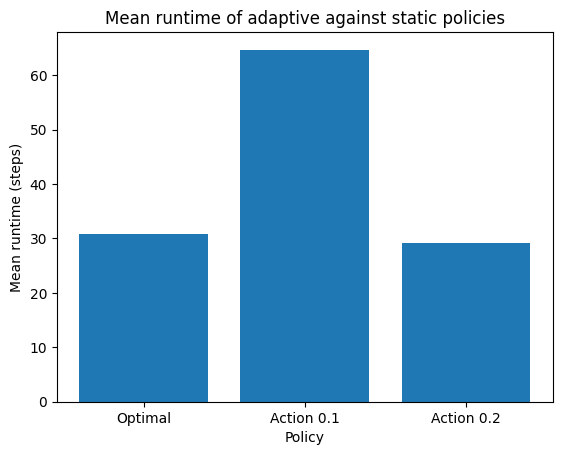

In [23]:
mean_runtimes = [np.mean(opt_samples)] + [np.mean(sp_samples[i]) for i in range(len(actions)) if sp_samples[i]]
policy_idxs = range(len(actions) + 1)

fig, ax = plt.subplots()
ax.bar(policy_idxs, mean_runtimes)
ax.set_xticks(policy_idxs)
ax.set_xticklabels(["Optimal"] + [f"Action {a}" for a in actions])
ax.set_ylabel("Mean runtime (steps)")
ax.set_xlabel("Policy")
ax.set_title("Mean runtime of adaptive against static policies")
plt.show()